In [72]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Linear regression in one dimension
class linear_regression_1D:
    
    # Class constructor
    def __init__(self):
        # Define the vector w (the slop of the line)
        # w is the two diemensional vector becuase we must absorb b into w
        self.w = np.zeros(2)
        # Define the learning rate
        self.alpha = 1

    # Class function to set the learning rate
    def set_learning_rate(self, alpha):
        self.alpha = alpha

    # Class function to fit the data (find the appropiate value of w)
    def fit(self, x, y, iteration=1500):
        self.y = y
        # Apply transformation to x. Recall that we must absorb b into w 
        self.x = np.append(x.transpose(), np.ones((x.shape[1], 1)), axis=1)
        # Iteratively make an updage for w by gradient descent
        for i in range(iteration):
            self.make_one_update()

    # Class function to make an update for w
    def make_one_update(self):
        w_current = self.w
        # Set step size 
        step = (-1)*self.alpha*self.compute_gradient(w_current)
        w_update = w_current + step
        
        # Report the progress of convergence
        current_loss = self.sq_loss(w_current)
        update_loss = self.sq_loss(w_update)
        if current_loss > update_loss:
            print("Loss decreases to ", update_loss,)
        else:
            print("Loss increases to ", update_loss,)
        self.w = w_update
    
    # Class function to compute the gradient with respect to the current w
    def compute_gradient(self, w_current):
        x = self.x
        y = self.y

        n = x.shape[0]

        grad_v = np.zeros(2)
        # Uncomment the following to implement how to compute the gradient vector 
        grad_v[0] = (2/n) * sum([(np.inner(w_current, x[k]) - y[k]) * x[k][0] for k in range(n)])
        grad_v[1] = (2/n) * sum([(np.inner(w_current, x[k]) - y[k]) * x[k][1] for k in range(n)])
        print("The norm of grad vector is ", math.sqrt(np.inner(grad_v, grad_v)))
        return grad_v

    # Class function to compute the square loss function
    def sq_loss(self, w):
        # Uncomment the following to implement how to compute the loss function
        x = self.x
        y = self.y

        n = x.shape[0]

        loss = (1/n) * sum([math.pow(np.inner(w, x[k]) - y[k], 2) for k in range(n)])
        return loss
        

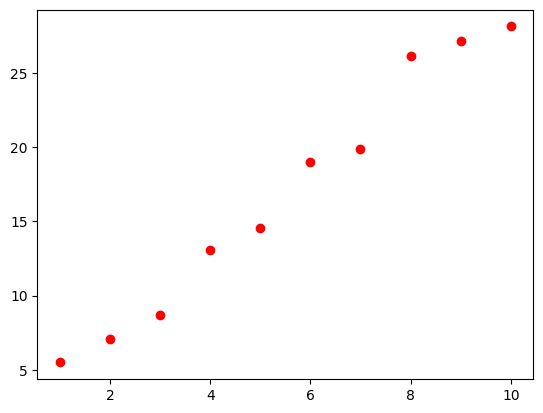

In [73]:
# Create our data set where x is one-dimensional
x = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])
y = np.array([5.5, 7.1, 8.7, 13.1, 14.56, 19.01, 19.85, 26.12, 27.11, 28.112])

# The 2D plot of our data
plt.plot(x.transpose(), y, 'ro')
plt.show()


In [74]:

h = linear_regression_1D()

# You may edit the learning rate if the current setting does not yield convergence
h.set_learning_rate(.01)

# Uncomment the following to fit the vector w to our data. 
# You may also edit the number of iterations if the current setting does not yield convergence
h.fit(x, y, iteration=1000)

The norm of grad vector is  234.07392581353437
Loss decreases to  17.649887851216004
The norm of grad vector is  50.141455471152014
Loss decreases to  2.3851912564595934
The norm of grad vector is  10.753824388871456
Loss decreases to  1.6819191080278229
The norm of grad vector is  2.3653124361778195
Loss decreases to  1.646770475884871
The norm of grad vector is  0.7369045470813277
Loss decreases to  1.6423004656138198
The norm of grad vector is  0.5557430069944456
Loss decreases to  1.6392619834078646
The norm of grad vector is  0.5438070212271837
Loss decreases to  1.6363129296847854
The norm of grad vector is  0.5410767750846707
Loss decreases to  1.633391527937782
The norm of grad vector is  0.5387839201766682
Loss decreases to  1.6304947463981094
The norm of grad vector is  0.5365203275541965
Loss decreases to  1.6276222502446303
The norm of grad vector is  0.5342671456024479
Loss decreases to  1.6247738300364567
The norm of grad vector is  0.5320234676576439
Loss decreases to  1

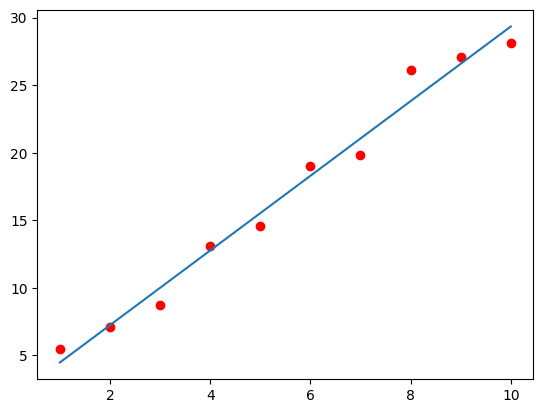

In [75]:
# The following codes is to give a 2D plot our data and the linear function that we learnt from our setting
plt.plot(x.transpose(), y, 'ro')
plt.plot(x.transpose(), x.transpose()*h.w[0]+h.w[1], linestyle='solid')
plt.show()